In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering

In [2]:
X_s, labels_s, = make_blobs(
    [200, 200],
    2,
    centers = [(4,4), (1, 1)],
    cluster_std=[0.65, 0.65],
    random_state=42
)

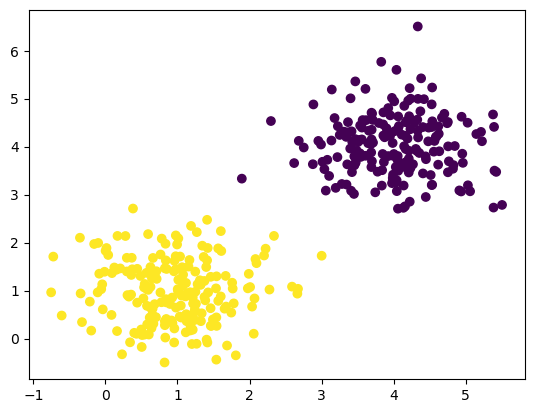

In [3]:
plt.scatter(X_s[:, 0], X_s[:, 1], c=labels_s)

In [4]:
def make_square_blobs(n_samples, centers, side=1, random_state=None, jitter=0.0, weights=None):
    #TODO: revise code generated by gpt, move it to another file
    """
    Centers: list of (x, y)
    side: side length of each square
    jitter: optional Gaussian noise to soften hard edges
    weights: optional class weights for uneven sizes
    """
    rng = np.random.default_rng(random_state)
    k = len(centers)

    if weights is None:
        counts = np.full(k, n_samples // k)
        counts[:n_samples - counts.sum()] += 1
    else:
        weights = np.asarray(weights) / np.sum(weights)
        counts = rng.multinomial(n_samples, weights)

    half = side / 2
    X_list, y_list = [], []
    for i, (cx, cy) in enumerate(centers):
        pts = rng.uniform(-half, half, size=(counts[i], 2)) + (cx, cy)
        if jitter > 0:
            pts += rng.normal(scale=jitter, size=pts.shape)
        X_list.append(pts)
        y_list.append(np.full(counts[i], i))
    return np.vstack(X_list), np.concatenate(y_list)

In [5]:
X_squares, label_squares = make_square_blobs(400, [(0.5, 4.5), (4.5, 0.5)], side=1.75)

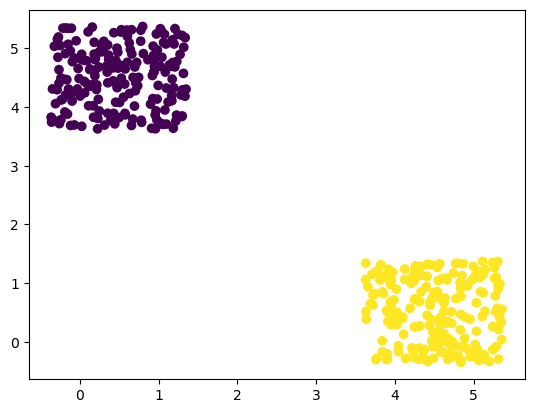

In [6]:
plt.scatter(X_squares[:, 0], X_squares[:, 1], c=label_squares)

In [7]:
X = np.vstack((X_s, X_squares))
y = np.vstack((labels_s, label_squares+2))

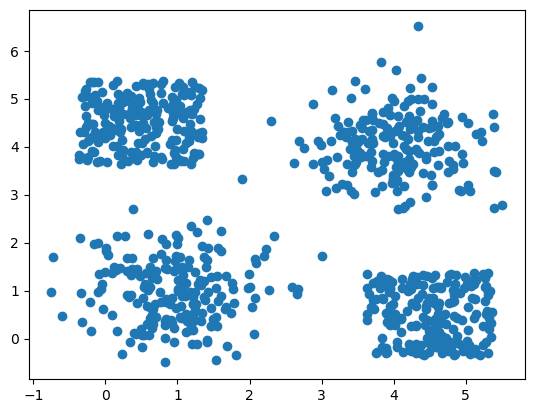

In [8]:
plt.scatter(X[:, 0], X[:, 1])

## spectral clustering

In [9]:
# clustering spettrale fatto a mano
s = 1.25

# step 1: definisco una misura di somiglianza per calcolare il grafo
def sim(x,y, sigma):
    return np.exp(-1 * np.linalg.norm(x-y, 2) / (2 * sigma)**2)
# 2. definisco il grafo, mediante la matrice delle distanze. poi calcolo la matrice dei gradi
A = np.zeros((800, 800))
D = np.zeros((800, 800))

for i in range(800):
    for j in range(800):
        A[i, j] = sim(X[i], X[j], s)


for i in range(800):
    D[i, i] = np.sum([A[i, j] for j in range(800)])


In [10]:
L = D-A

In [11]:
# 3. calcolo gli autovalori di L per k=4
k=4

eigval, eigvec = np.linalg.eig(L)

In [12]:
# 4. prendo le prime quattro colonne degli autovettori
V = eigvec[:, :k]

# 5. (finale): uso K-means su V
from sklearn.cluster import KMeans
kmeans = KMeans(k)

predicted = kmeans.fit_predict(V)

In [13]:
# plot

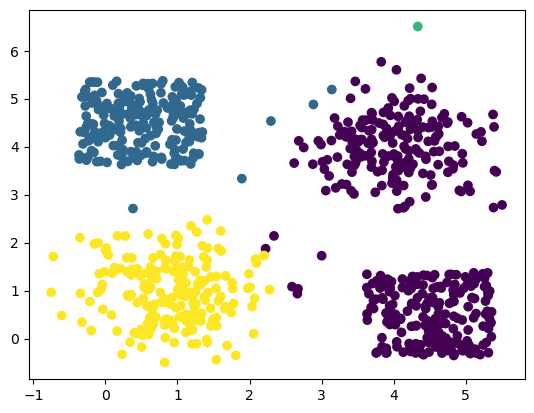

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=predicted)

In [15]:
# problema: roba bruttissima... come risolvo?
# approccio possibile: uso la laplaciana NORMALIZZATA
# cosa farò io: spectral clustering basata sulla SVD

## SVD-based spectral clustering

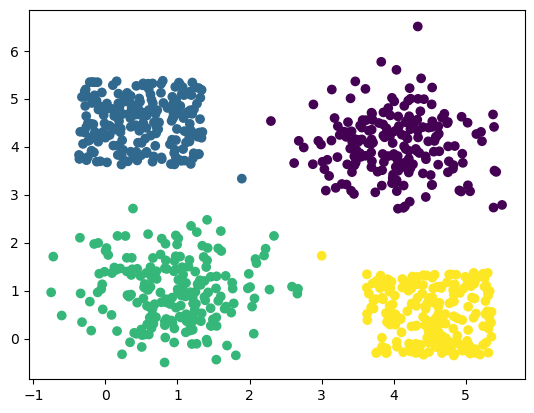

In [16]:
# riutilizzo la matrice A costruita prima

# calcolo la SVD di A
U, S, Vh = np.linalg.svd(A)

# prendo i primi l vettori singolari (l=k)
l = 4
U_reduced = U[:, :l]

# k means su U_reduced
predicted_alt = kmeans.fit_predict(U_reduced)

plt.scatter(X[:, 0], X[:, 1], c=predicted_alt)

In [17]:
# WTF???? HOW WHAT NO WAY